# Loan Data Analysis from Prosper
## by Aman Kumbhani

## Investigation Overview

The goal of this investigation is to visualize what features affect the loan granting system & what features must be considered before granting a loan to any applicant.

## Dataset Overview
The data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. Out of these, we will be using about 15 most important features.

In [8]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [9]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
df_copy = df.copy()

In [10]:
# Creating a list of column names which will be used for analysis
col_used = ['ListingKey', 'ListingCreationDate', 'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)',
           'BorrowerState', 'Occupation', 'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeRange', 'StatedMonthlyIncome',
           'Recommendations', 'Investors', 'LoanOriginalAmount']
df_copy = df_copy[col_used]
df_copy.sample(2)
# Rename column names to make it simpler for analysis
df_copy.rename(columns = {'ProsperRating (Alpha)' : 'ProsperRatingA',
                          'ListingCategory (numeric)' : 'ListingCategoryN',
                          'Recommendations' : 'Recom'}, inplace=True)
df_copy.sample(2)
# Fixing null values
df_copy.dropna(inplace=True)
# Fixing ListingCreationDate to datetime instead of object 
df_copy['ListingCreationDate'] = pd.to_datetime(df_copy['ListingCreationDate'])
# Fixing Term into categorical datatype
df_copy['Term'] = df_copy['Term'].astype('category')
# Testing 
df_copy.info()
# To make use of ProsperRatingA feature, we need to only have entries post July 2009.
df_copy = df_copy.query('ListingCreationDate > "2009-08-01"')
df_copy.sample(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83520 entries, 1 to 113936
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ListingKey           83520 non-null  object        
 1   ListingCreationDate  83520 non-null  datetime64[ns]
 2   Term                 83520 non-null  category      
 3   LoanStatus           83520 non-null  object        
 4   BorrowerRate         83520 non-null  float64       
 5   ProsperRatingA       83520 non-null  object        
 6   ListingCategoryN     83520 non-null  int64         
 7   BorrowerState        83520 non-null  object        
 8   Occupation           83520 non-null  object        
 9   EmploymentStatus     83520 non-null  object        
 10  IsBorrowerHomeowner  83520 non-null  bool          
 11  IncomeRange          83520 non-null  object        
 12  StatedMonthlyIncome  83520 non-null  float64       
 13  Recom                83520 non

,ListingKey,ListingCreationDate,Term,LoanStatus,BorrowerRate,ProsperRatingA,ListingCategoryN,BorrowerState,Occupation,EmploymentStatus,IsBorrowerHomeowner,IncomeRange,StatedMonthlyIncome,Recom,Investors,LoanOriginalAmount
47467,3295358358507199255955B,2013-07-10 14:54:09.630,60,Current,0.2179,C,3,MD,Other,Employed,True,"$25,000-49,999",3583.333333,0,1,10000
5576,385B3518086842430D6018C,2011-06-13 10:52:51.820,36,Chargedoff,0.3199,E,3,CA,Other,Other,False,"$50,000-74,999",4166.666667,0,89,4000
11897,5EED360143938424803B482,2014-01-20 17:27:02.363,60,Current,0.2150,D,1,OR,Other,Employed,False,"$25,000-49,999",2868.666667,0,1,10000
98181,EF8A3579468530190A24C2A,2013-05-22 23:08:35.730,60,Current,0.1984,C,7,MN,Sales - Retail,Employed,False,"$1-24,999",1916.666667,0,1,2000
44221,169B36040263472082E8C55,2014-03-03 19:32:30.283,36,Current,0.0920,A,1,CA,Food Service,Employed,False,"$25,000-49,999",2416.666667,0,1,4000


## Most common prosper ratings across the dataset
There are a total of 7 prosper ratings across the dataset, August 2009 onwards. C being the most common rating with 21.5%.

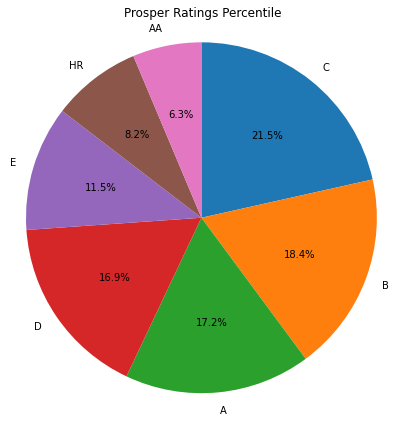

In [11]:
plt.figure(figsize = [7, 10])
plt.pie(df_copy.ProsperRatingA.value_counts(), labels = df_copy.ProsperRatingA.value_counts().index, startangle = 90,
        counterclock = False, autopct   = '%.1f%%');
plt.title("Prosper Ratings Percentile")
plt.axis('square');

In [12]:
ProsperRating_Alpha_classes = ['AA','A', 'B', 'C', 'D', 'E', 'HR']
IncomeRange_classes = ['$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
pd_ver = pd.__version__.split(".")

if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21): # v0.21 or later
    vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ProsperRating_Alpha_classes)
    df_copy['ProsperRatingA'] = df_copy['ProsperRatingA'].astype(vclasses)
    vclasses_1 = pd.api.types.CategoricalDtype(ordered = True, categories = IncomeRange_classes)
    df_copy['IncomeRange'] = df_copy['IncomeRange'].astype(vclasses_1)
else: # compatibility for v.20
    df_copy['ProsperRatingA'] = df_copy['ProsperRatingA'].astype('category', ordered = True,
                                                     categories = ProsperRating_Alpha_classes)
    df_copy['IncomeRange'] = df_copy['IncomeRange'].astype('category', ordered = True,
                                                     categories = IncomeRange_classes)

## Income Range Versus Loan Amount
Here, we can see that the loan amount is more as the income range increases per category.

Text(0.5, 1.0, 'Income Range vs Loan Amount')

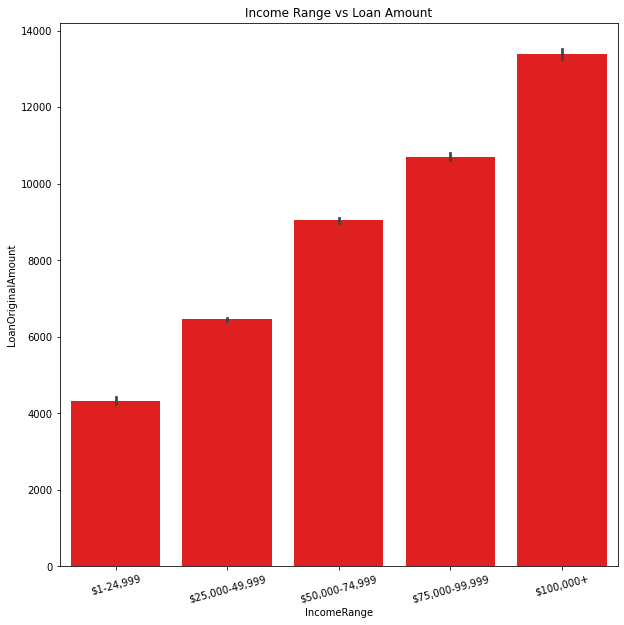

In [13]:
plt.figure(figsize=[10,10])
ax1 = sb.barplot(data = df_copy, x = 'IncomeRange', y = 'LoanOriginalAmount', color = 'red')
plt.xticks(rotation = 15);
plt.title('Income Range vs Loan Amount')

## Home owner effect on Income Range & Borrower Rate
It can be seen that for lower income range, the borrorwer rate for the applicant is much higher for both, has a home or not. However, as the income range increases, the borrower rate tends to decrease and is slightly lower for applicants owning a home. 

Text(0.5, 1.0, 'Borrower Rates Versus Income Range for Home Owners')

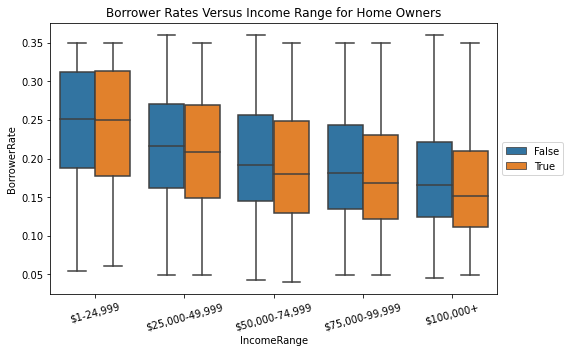

In [14]:
plt.figure(figsize=[8,5])
df_copy_sub = df_copy.loc[df_copy['IsBorrowerHomeowner'].isin(['0', '1'])]
sb.boxplot(data = df_copy_sub, x = 'IncomeRange', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner')
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5)) # legend to right of figure
plt.xticks(rotation = 15)
plt.title('Borrower Rates Versus Income Range for Home Owners')

In [ ]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle